In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt



In [2]:
# Parameters for simulation
df = pd.DataFrame()
num_variants = 100000
n_simulations = 1000  
effect_size_mean = 0.5  # Mean effect size
effect_size_std = 0.2  # Standard deviation of effect sizes
maf_mean = 0.3  # Mean Minor Allele Frequency (MAF)
maf_std = 0.1  # Standard deviation of MAF
coef_mean = 0.2  # Mean coefficient estimate
coef_std = 0.05  # Standard deviation of coefficient estimates


In [7]:

# Generate fake effect size data
df['effect_size'] = np.random.normal(loc=effect_size_mean, scale=effect_size_std, size=n_simulations)

# Generate fake p-values using a uniform distribution
df['p_value'] = np.random.uniform(0, 1, size=n_simulations)


# Generate fake MAFs using a normal distribution
mafs = np.random.normal(loc=maf_mean, scale=maf_std, size=n_simulations)
df['maf'] = np.clip(mafs, 0, 0.5)  # Clip MAFs to the [0, 0.5] range

# Generate fake coefficient estimates using a normal distribution
df['Beta_G'] = np.random.normal(loc=coef_mean, scale=coef_std, size=n_simulations)


(array([107.,  99.,  91.,  87., 101., 100., 114., 102., 106.,  93.]),
 array([0.00321826, 0.10283781, 0.20245736, 0.3020769 , 0.40169645,
        0.50131599, 0.60093554, 0.70055509, 0.80017463, 0.89979418,
        0.99941373]),
 <BarContainer object of 10 artists>)

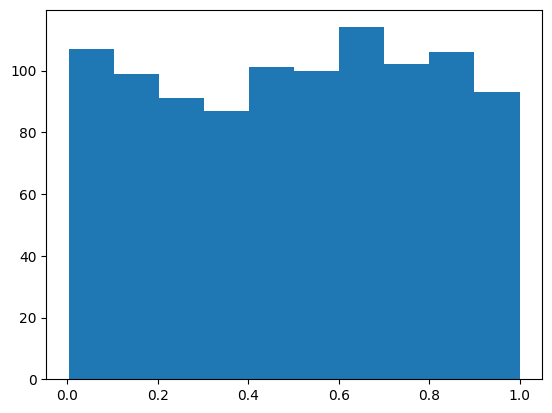

In [8]:
plt.hist(df['p_value'])

In [15]:
df.to_csv('gs://fc-e4b9029b-bcb4-41b6-8edc-5b37e7719bf5/sleep_lipids_files/mock_summary.csv')

In [13]:
import numpy as np
from scipy.stats import t

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for simulation
n_samples = 1000  # Number of samples per group and cohort
cohorts = ['Cohort1', 'Cohort2']
populations = ['Pop1', 'Pop2', 'Pop3']
groups = ['Male', 'Female']
exposures = ['Exp1']
outcomes = ['Out1']
alpha = 0.05  # Significance level

# Simulate fake data
fake_data = {}
for cohort in cohorts:
    for group in groups:
        for pop in populations:
            for exposure in exposures:
                for outcome in outcomes: (instead of one data point; generate summary stats using a func; i.e 1000 data points for this loop)
                    key = f'{cohort}_{group}_{pop}_{exposure}_{outcome}'
                    n = n_samples
                    mean = np.random.uniform(-1, 1)
                    std_dev = np.random.uniform(0.5, 1.5)
                    data = np.random.normal(loc=mean, scale=std_dev, size=n)
                    fake_data[key] = data

# Calculate fake summary statistics
fake_results = {}
for key, data in fake_data.items():
    cohort, group, pop, exposure, outcome = key.split('_')
    n = len(data)

    # Perform t-test
    t_statistic, p_value = ttest_ind(data, np.zeros(n))

    # Calculate effect size (Cohen's d)
    cohens_d = np.mean(data) / np.std(data)

    # Generate a fake beta coefficient
    beta_coefficient = np.random.uniform(-0.5, 0.5)

    fake_results[key] = {
        'Cohort': cohort,
        'Group': group,
        'Population': pop,
        'Exposure': exposure,
        'Outcome': outcome,
        'Beta Coefficient': beta_coefficient,
        'Effect Size (Cohen\'s d)': cohens_d,
        'p-value': p_value
    }

results_df = pd.DataFrame.from_dict(fake_results, orient='index')


In [14]:
results_df.head()

,Cohort,Group,Population,Exposure,Outcome,Beta Coefficient,Effect Size (Cohen's d),p-value
Cohort1_Male_Pop1_Exp1_Out1,Cohort1,Male,Pop1,Exp1,Out1,0.282988,-0.154763,1.080287e-06
Cohort1_Male_Pop2_Exp1_Out1,Cohort1,Male,Pop2,Exp1,Out1,-0.319224,-0.586945,5.185226e-71
Cohort1_Male_Pop3_Exp1_Out1,Cohort1,Male,Pop3,Exp1,Out1,0.300158,-0.495099,3.721814e-52
Cohort1_Female_Pop1_Exp1_Out1,Cohort1,Female,Pop1,Exp1,Out1,0.141737,-0.497280,1.416255e-52
Cohort1_Female_Pop2_Exp1_Out1,Cohort1,Female,Pop2,Exp1,Out1,0.168952,-0.083108,8.684934e-03


In [ ]:
define a vector of variants (100,000) call them rsid; and keep this constant across all files;Beta coeff can be drawn from normal distribution centered around 0; gamma distribution standard errors (or variances); effect size for a vrainat in a population


In [ ]:
SNPID              - The SNP identifier as retrieved from the genotype file.
RSID               - The reference SNP ID number. (BGEN only)
CHR                - The chromosome of the SNP.
POS                - The physical position of the SNP.
Non_Effect_Allele  - The allele not counted in association testing.  
Effect_Allele      - The allele that is counted in association testing. 


These are constant across all runs; generate allele frequency (and maf)

In [3]:
# Number of variants
num_variants = 100000

# Simulate data
rsid = ['rs' + str(i) for i in range(1, num_variants + 1)]
chr_list = np.random.choice(range(1, 22), size=num_variants)
pos_list = np.sort(np.random.randint(1000000, 300000000, size=num_variants))
non_effect_alleles = np.random.choice(['A', 'C', 'G', 'T'], size=num_variants)
effect_alleles = np.random.choice(['A', 'C', 'G', 'T'], size=num_variants)

# Create a DataFrame
data = {
    'rsid': rsid,
    'CHR': chr_list,
    'POS': pos_list,
    'Non_Effect_Allele': non_effect_alleles,
    'Effect_Allele': effect_alleles
}

df = pd.DataFrame(data)

print(df.head())


  rsid  CHR      POS Non_Effect_Allele Effect_Allele
0  rs1    7  1003623                 A             A
1  rs2   20  1006556                 A             G
2  rs3   15  1006941                 G             C
3  rs4   11  1008464                 T             G
4  rs5    8  1009772                 T             A


In [7]:
# Define the lists for different categories
cohorts = ['cohort1', 'cohort2']
groups = ['male', 'female', 'combined']
populations = ['pop1', 'pop2', 'pop3']
exposures = ['exp1']
outcomes = ['out1']
shape = 2.0
scale = 2.0


# Generate fake summary statistics
def generate_summary_stats(num_variants):
    beta_coefficient = np.random.uniform(-0.5, 0.5)
    mafs = np.random.normal(loc=maf_mean, scale=maf_std, size=num_variants) #MAF = 1- major af 
    MAF = np.clip(mafs, 0, 0.5)  # Clip MAFs to the [0, 0.5] range
    se = np.random.gamma(shape, scale, size =num_variants)
    p_value = np.random.uniform(0, 1, size=num_variants)
    effect_size = beta_coefficient / se # this is the z statistic # effect siz eis the same as beta coef
    
    return beta_coefficient, se, p_value, effect_size, MAF



In [8]:
# Loop through different combinations and generate summary statistics
for cohort in cohorts:
    for group in groups:
        for pop in populations:
            for exposure in exposures:
                for outcome in outcomes:
                    num_variants = len(df)
                    beta, se, p_value, effect_size, MAF = generate_summary_stats(num_variants)
                    
                    # Create a variable name based on the combination
                    var_name = f"{cohort}_{group}_{pop}_{exposure}_{outcome}_df"
                    print(var_name)
                    
                    # Create a DataFrame for the current combination
                    globals()[var_name] = pd.DataFrame({
                        'rsid': rsid,
                        'Cohort': cohort,
                        'Group': group,
                        'Population': pop,
                        'Exposure': exposure,
                        'Outcome': outcome,
                        'Beta': beta,
                        'SE': se,
                        'P_value': p_value,
                        'Effect_size': effect_size,
                        'MAF': MAF
                    })


print(cohort1_male_pop1_exp1_out1_df.head())


cohort1_male_pop1_exp1_out1_df
cohort1_male_pop2_exp1_out1_df
cohort1_male_pop3_exp1_out1_df
cohort1_female_pop1_exp1_out1_df
cohort1_female_pop2_exp1_out1_df
cohort1_female_pop3_exp1_out1_df
cohort1_combined_pop1_exp1_out1_df
cohort1_combined_pop2_exp1_out1_df
cohort1_combined_pop3_exp1_out1_df
cohort2_male_pop1_exp1_out1_df
cohort2_male_pop2_exp1_out1_df
cohort2_male_pop3_exp1_out1_df
cohort2_female_pop1_exp1_out1_df
cohort2_female_pop2_exp1_out1_df
cohort2_female_pop3_exp1_out1_df
cohort2_combined_pop1_exp1_out1_df
cohort2_combined_pop2_exp1_out1_df
cohort2_combined_pop3_exp1_out1_df
  rsid   Cohort Group Population Exposure Outcome      Beta        SE  \
0  rs1  cohort1  male       pop1     exp1    out1 -0.248286  2.967537   
1  rs2  cohort1  male       pop1     exp1    out1 -0.248286  2.396131   
2  rs3  cohort1  male       pop1     exp1    out1 -0.248286  7.272539   
3  rs4  cohort1  male       pop1     exp1    out1 -0.248286  9.628947   
4  rs5  cohort1  male       pop1     exp1